In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Alzheimer's Disease\alzheimers_disease_data.csv")

In [3]:
data.drop(columns=["PatientID",'DoctorInCharge'] , inplace=True)

In [4]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Anacondaa\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:57:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Tuned XGBoost Classification Report:
Best Params: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       401
           1       0.95      0.89      0.92       244

    accuracy                           0.94       645
   macro avg       0.94      0.93      0.94       645
weighted avg       0.94      0.94      0.94       645

Accuracy: 0.9411
F1 Score: 0.9407


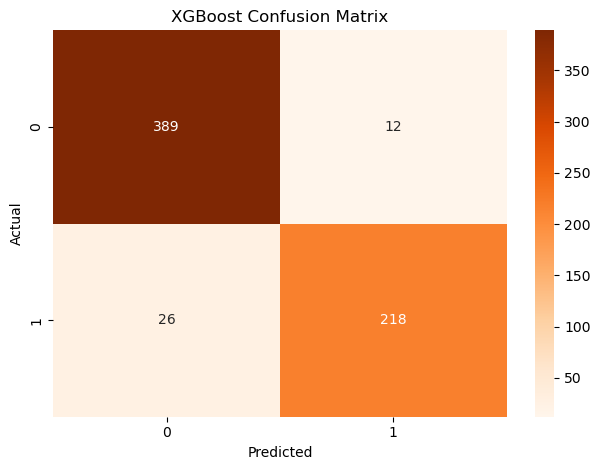

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.5, 1]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("\nTuned XGBoost Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Anacondaa\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Tuned Random Forest Classification Report:
Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       401
           1       0.95      0.85      0.90       244

    accuracy                           0.93       645
   macro avg       0.93      0.91      0.92       645
weighted avg       0.93      0.93      0.92       645

Accuracy: 0.9256
F1 Score: 0.9247


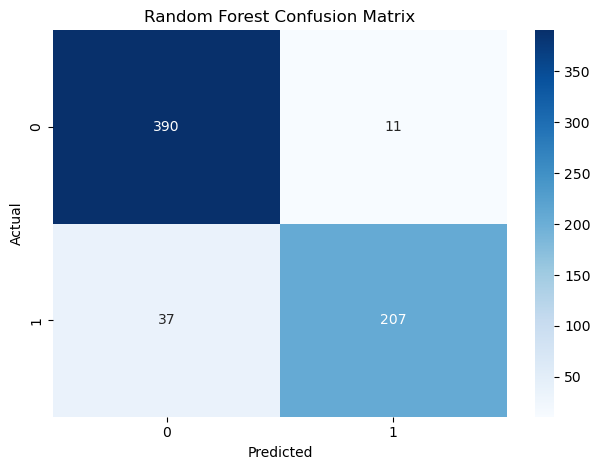

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluation
print("\nTuned Random Forest Classification Report:")
print(f"Best Params: {random_search.best_params_}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
